In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('zuu crew scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [13]:
FEATURES = ["Attendance", "TotalHours", "AssignmentsCompleted", 
            "HackathonParticipation", "PeerReviewScore"]
TARGET = "CapstoneScore"

In [14]:
X_raw = df[FEATURES].values.astype(float)
y = df[TARGET].values.astype(float)


In [15]:
mu = X_raw.mean(axis=0)
sigma = X_raw.std(axis=0, ddof=0)
sigma_safe = np.where(sigma == 0, 1.0, sigma)       # guard zero-variance
X_scaled = (X_raw - mu) / sigma_safe

In [16]:
m = len(y)
X = np.c_[np.ones((m, 1)), X_scaled]  

In [17]:
def compute_cost(X, y, beta):
    m = len(y)
    y_hat = X.dot(beta)
    cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    return cost

def gradient_descent(X, y, beta, lr, n_iter):
    m = len(y)
    cost_histroy = []

    for i in range(n_iter):
        y_hat = X.dot(beta)
        gradients = (1 / m) * X.T.dot(y_hat - y)
        beta = beta - lr * gradients
        cost = compute_cost(X, y, beta)
        cost_histroy.append(cost)
        if i % 100 == 0:
            print(f"Iteration : {i}: Cost : {cost:.4f}")

    return cost_histroy, beta

def predict(X, beta):
    return X.dot(beta)

# === Train multivariate linear regression (5 features) ===
np.random.seed(42)
beta0 = np.zeros(X.shape[1])     # start from zeros; you can try small randoms
lr = 0.01
n_iter = 8000

cost_history, beta = gradient_descent(X, y, beta0, lr, n_iter)
y_pred = predict(X, beta)

Iteration : 0: Cost : 1628.3791
Iteration : 100: Cost : 227.5618
Iteration : 200: Cost : 40.3059
Iteration : 300: Cost : 14.9248
Iteration : 400: Cost : 11.4194
Iteration : 500: Cost : 10.9214
Iteration : 600: Cost : 10.8476
Iteration : 700: Cost : 10.8360
Iteration : 800: Cost : 10.8340
Iteration : 900: Cost : 10.8337
Iteration : 1000: Cost : 10.8336
Iteration : 1100: Cost : 10.8336
Iteration : 1200: Cost : 10.8336
Iteration : 1300: Cost : 10.8336
Iteration : 1400: Cost : 10.8336
Iteration : 1500: Cost : 10.8336
Iteration : 1600: Cost : 10.8336
Iteration : 1700: Cost : 10.8336
Iteration : 1800: Cost : 10.8336
Iteration : 1900: Cost : 10.8336
Iteration : 2000: Cost : 10.8336
Iteration : 2100: Cost : 10.8336
Iteration : 2200: Cost : 10.8336
Iteration : 2300: Cost : 10.8336
Iteration : 2400: Cost : 10.8336
Iteration : 2500: Cost : 10.8336
Iteration : 2600: Cost : 10.8336
Iteration : 2700: Cost : 10.8336
Iteration : 2800: Cost : 10.8336
Iteration : 2900: Cost : 10.8336
Iteration : 3000: C

In [18]:
# === Metrics ===
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)
def mae(y_true, y_pred): return np.mean(np.abs(y_true - y_pred))
def rmse(y_true, y_pred): return np.sqrt(mse(y_true, y_pred))
def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


In [19]:


print("\n=== Multivariate Linear Regression (5 features) ===")
print("Betas (β0 + coefficients on SCALED features):")
for j, b in enumerate(beta):
    name = "Intercept" if j == 0 else FEATURES[j-1]
    print(f"  {name:>24}: {b: .6f}")
print(f"MSE : {mse(y, y_pred):.4f}")
print(f"MAE : {mae(y, y_pred):.4f}")
print(f"RMSE: {rmse(y, y_pred):.4f}")
print(f"R²  : {r2(y, y_pred):.4f}")




=== Multivariate Linear Regression (5 features) ===
Betas (β0 + coefficients on SCALED features):
                 Intercept:  55.108333
                Attendance:  0.767767
                TotalHours:  16.171942
      AssignmentsCompleted: -0.023392
    HackathonParticipation:  0.045396
           PeerReviewScore:  1.521638
MSE : 21.6671
MAE : 3.6441
RMSE: 4.6548
R²  : 0.9242


In [20]:
# === Optional: Compare to polynomial on TotalHours (degrees 1,2,3) ===
def poly_features_1d(x, degree):
    x = x.reshape(-1, 1)
    cols = [np.ones_like(x)]
    for d in range(1, degree + 1):
        cols.append(x ** d)
    return np.hstack(cols)

def fit_poly_TOTALHOURS(degree, lr=0.01, n_iter=8000):
    x = df["TotalHours"].astype(float).values
    # standardize base feature first for stable GD (like above pipeline)
    x_mu, x_sigma = x.mean(), x.std(ddof=0) or 1.0
    xz = (x - x_mu) / x_sigma
    Xp = poly_features_1d(xz, degree)         # includes intercept
    beta0 = np.zeros(Xp.shape[1])
    ch, b = gradient_descent(Xp, y, beta0, lr, n_iter)   # uses yOUR GD
    yp = predict(Xp, b)
    return {"degree": degree,
            "beta": b,
            "mse": mse(y, yp),
            "rmse": rmse(y, yp),
            "r2": r2(y, yp)}

res_poly = [fit_poly_TOTALHOURS(d, lr=0.01, n_iter=8000) for d in [1, 2, 3]]

print("\n=== Linear (5 features) vs Polynomial (TotalHours only) ===")
print("Model\t\tR²\t\tRMSE\t\tMSE")
print(f"Linear(5f)\t{r2(y, y_pred):.4f}\t{rmse(y, y_pred):.4f}\t{mse(y, y_pred):.4f}")
for r in res_poly:
    print(f"Poly d={r['degree']}\t{r['r2']:.4f}\t{r['rmse']:.4f}\t{r['mse']:.4f}")

Iteration : 0: Cost : 1628.5159
Iteration : 100: Cost : 228.9669
Iteration : 200: Cost : 41.4558
Iteration : 300: Cost : 16.3331
Iteration : 400: Cost : 12.9671
Iteration : 500: Cost : 12.5162
Iteration : 600: Cost : 12.4558
Iteration : 700: Cost : 12.4477
Iteration : 800: Cost : 12.4466
Iteration : 900: Cost : 12.4464
Iteration : 1000: Cost : 12.4464
Iteration : 1100: Cost : 12.4464
Iteration : 1200: Cost : 12.4464
Iteration : 1300: Cost : 12.4464
Iteration : 1400: Cost : 12.4464
Iteration : 1500: Cost : 12.4464
Iteration : 1600: Cost : 12.4464
Iteration : 1700: Cost : 12.4464
Iteration : 1800: Cost : 12.4464
Iteration : 1900: Cost : 12.4464
Iteration : 2000: Cost : 12.4464
Iteration : 2100: Cost : 12.4464
Iteration : 2200: Cost : 12.4464
Iteration : 2300: Cost : 12.4464
Iteration : 2400: Cost : 12.4464
Iteration : 2500: Cost : 12.4464
Iteration : 2600: Cost : 12.4464
Iteration : 2700: Cost : 12.4464
Iteration : 2800: Cost : 12.4464
Iteration : 2900: Cost : 12.4464
Iteration : 3000: C

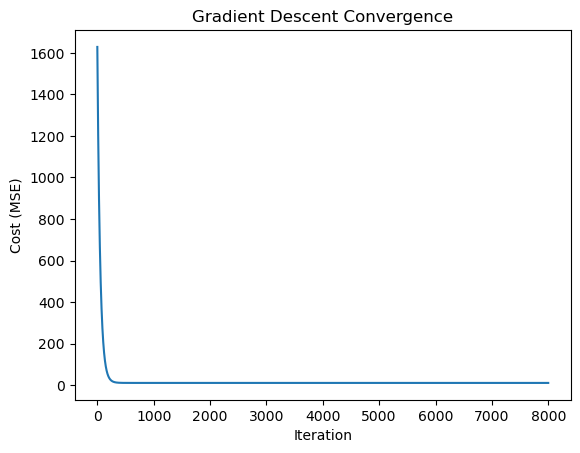

In [21]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

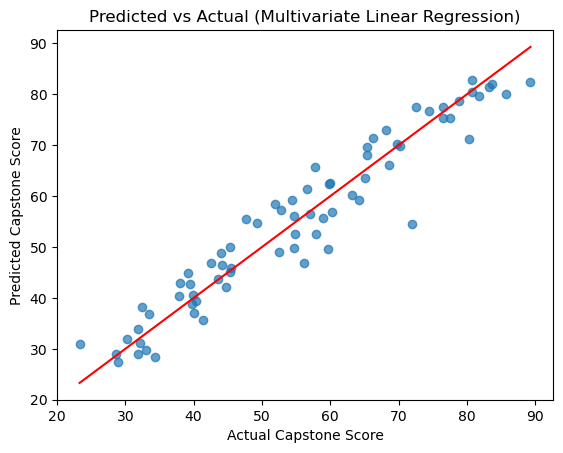

In [22]:
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Capstone Score")
plt.ylabel("Predicted Capstone Score")
plt.title("Predicted vs Actual (Multivariate Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")  # 45° line
plt.show()

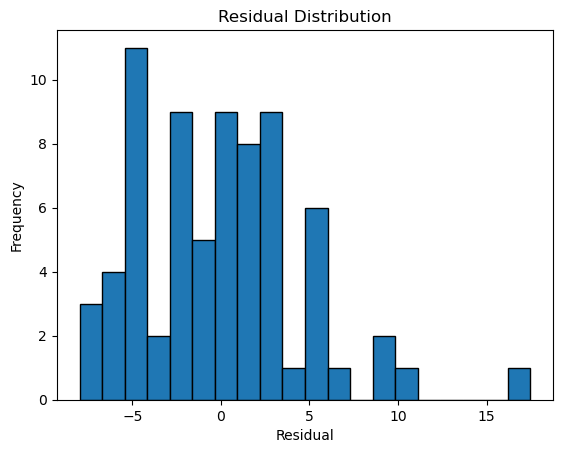

In [23]:
residuals = y - y_pred
plt.hist(residuals, bins=20, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()